# Visión por Computadora I #

## CEIA 21Co2025 ##

## TP1 - Parte 1 ##


José Aviani (jose.aviani@gmail.com)

José Luis Diaz (diazjoseluis@gmail.com)

Ricardo Silvera (rsilvera@thalu.com.ar)


---

### Importar lo necesario

In [ ]:
%pip install cv
%pip install numpy
%pip install matplotlib

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Funciones auxiliares

In [34]:
def _mostrar_histograma_rgb(ax, img, title):
    """
    Grafíca histogramas de la imagen `img` en sub-plot `ax`
    """

    colores = ('r', 'g', 'b')
    ax.set_title(title)

    for i, color in enumerate(colores):
        # Calcula el histograma para el canal de color actual
        hist = img[:, :, i].ravel()
        ax.hist(hist, bins=256, range=[0, 256], color=color, alpha=0.5, label=f'Canal {color.upper()}')

    ax.set_xlabel('Valor de Píxel')
    ax.set_ylabel('Frecuencia')
    ax.legend()


In [35]:
def procesarMuestra(file, percentiles=[100]):
    # Esta función lee imagen desde el path especificado y muestra:
    # - una fila con la imagen en cuestión y al lado un histograma de los canales RGB de la imagen.
    # - una fila por percentil con la imagen aplicada white patch (utilizando el percentil indicado) y al lado el histograma de la imagen.

    img_antes_bgr = cv.imread(file, cv.IMREAD_COLOR)
    img_antes_rgb = cv.cvtColor(img_antes_bgr, cv.COLOR_BGR2RGB)

    filas = 1 + len(percentiles)
    fig, axs = plt.subplots(filas, 2, figsize=(14, filas*5))

    axs[0, 0].imshow(img_antes_rgb)
    axs[0, 0].set_title('Imagen original')
    axs[0, 0].axis('off')

    _mostrar_histograma_rgb(axs[0, 1], img_antes_rgb, f'Histograma: Imagen original')

    i = 1
    for percentil in percentiles:
        img_despues = white_patch(img_antes_rgb, percentil)

        axs[i, 0].imshow(img_despues)
        axs[i, 0].set_title(f'Imagen: whitepatch p{percentil}')
        axs[i, 0].axis('off')

        _mostrar_histograma_rgb(axs[i, 1], img_despues, f'Histograma: imagen whitepatch p{percentil}')
        i = i + 1

    plt.tight_layout()
    plt.show()


### Algoritmo White Patch

El algoritmo White Patch ajusta el balance de blancos de una imagen asumiendo que existe un píxel blanco puro (o casi blanco) en la escena original. Para ello, busca el valor máximo en cada canal (B, G, R) y escala todos los valores de ese canal de modo que el máximo alcance 255.


In [37]:
def white_patch(img, percentil=100):
    """Aplica el algoritmo White Patch para corrección de balance de blancos en una imagen a color (BGR)."""

    perc_vals = np.percentile(img.reshape(-1, 3), percentil, axis=0)

    print(f"Valores de referencia (percentil {percentil}) para [R, G, B]: {perc_vals}")

    img_corr = img / perc_vals * 255.0
    img_corr = np.clip(img_corr, 0, 255).astype(np.uint8)
    return img_corr


### Pruebas


#### Primer conjunto de pruebas: Manos

A continuación se procesarán un conjunto de imagenes utilizando función `procesarMuestra`, utilizando el percentil=100. Luego de procesar todas las muestra habrá un comentario sobre estas.

Valores de referencia (percentil 100) para [R, G, B]: [247. 157. 175.]


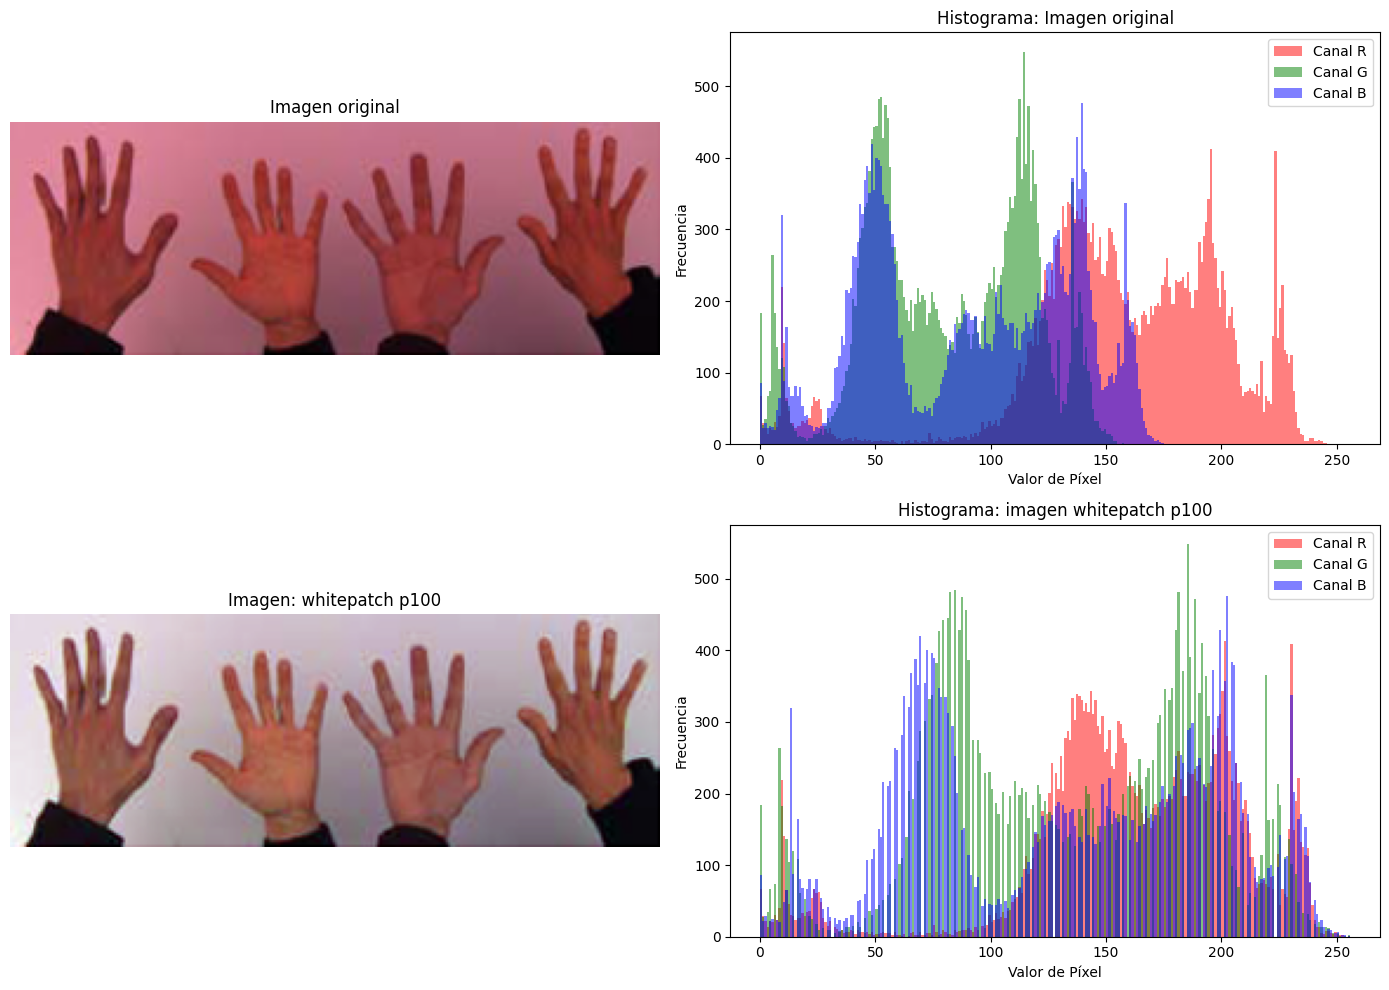

In [38]:
procesarMuestra('white_patch/test_red.png')

Valores de referencia (percentil 100) para [R, G, B]: [210. 250. 171.]


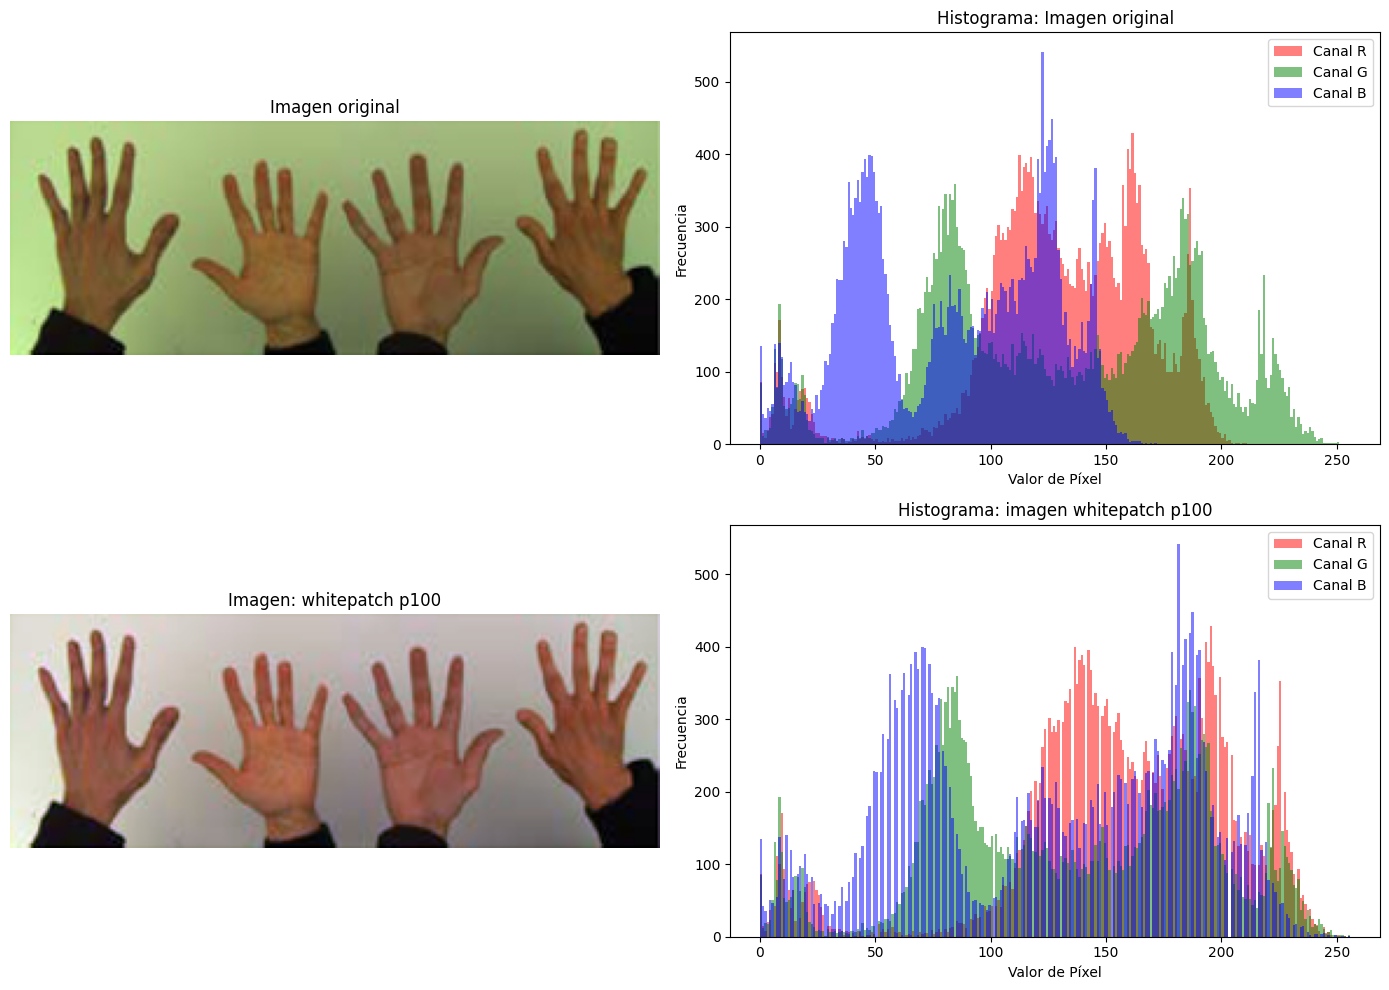

In [39]:
procesarMuestra('white_patch/test_green.png')

Valores de referencia (percentil 100) para [R, G, B]: [165. 138. 200.]


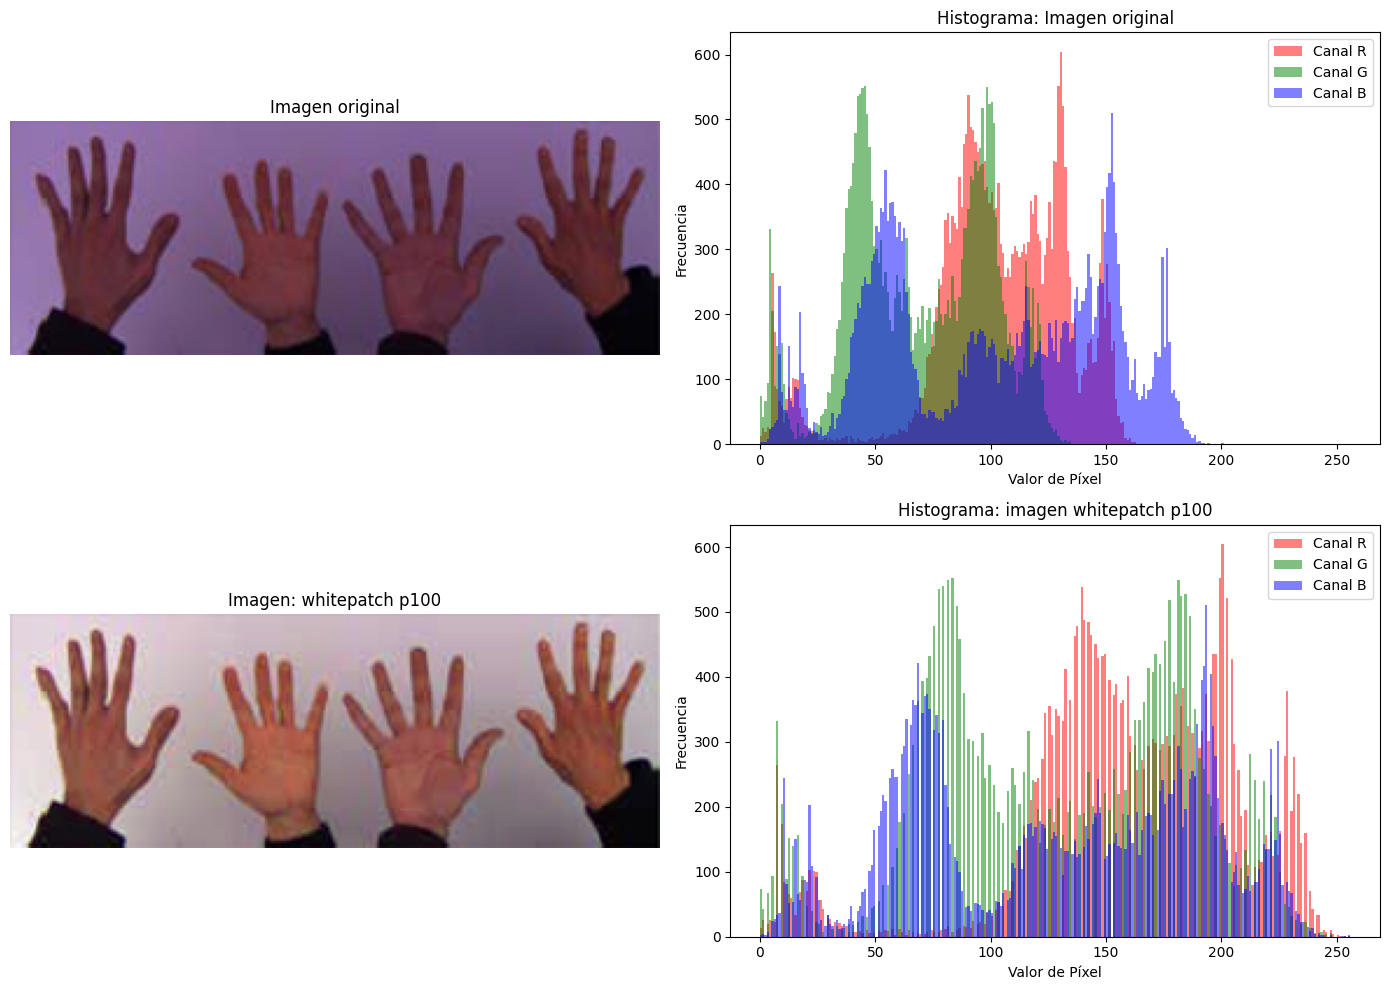

In [40]:
procesarMuestra('white_patch/test_blue.png')

En las imágenes anteriores, el resultado es bueno, ya que los valores en los píxeles de los canales no predominantes tienen máximos por debajo de 200 y se concentran en la zona de tonos medios. Al escalarlos, se logra compensar el color predominante en la imagen original y se observa un desplazamiento casi homogéneo hacia la derecha en los canales no predominantes.


#### Segundo conjunto de pruebas: depredador

A continuación un nuevo conjunto de imágenes. En este caso utilizando diferentes percentiles. Habrá un comentario sobre la imagen luego de procesar cada imágen.


Valores de referencia (percentil 100) para [R, G, B]: [126. 252. 155.]
Valores de referencia (percentil 98) para [R, G, B]: [ 87. 242. 118.]
Valores de referencia (percentil 95) para [R, G, B]: [ 80. 237. 113.]


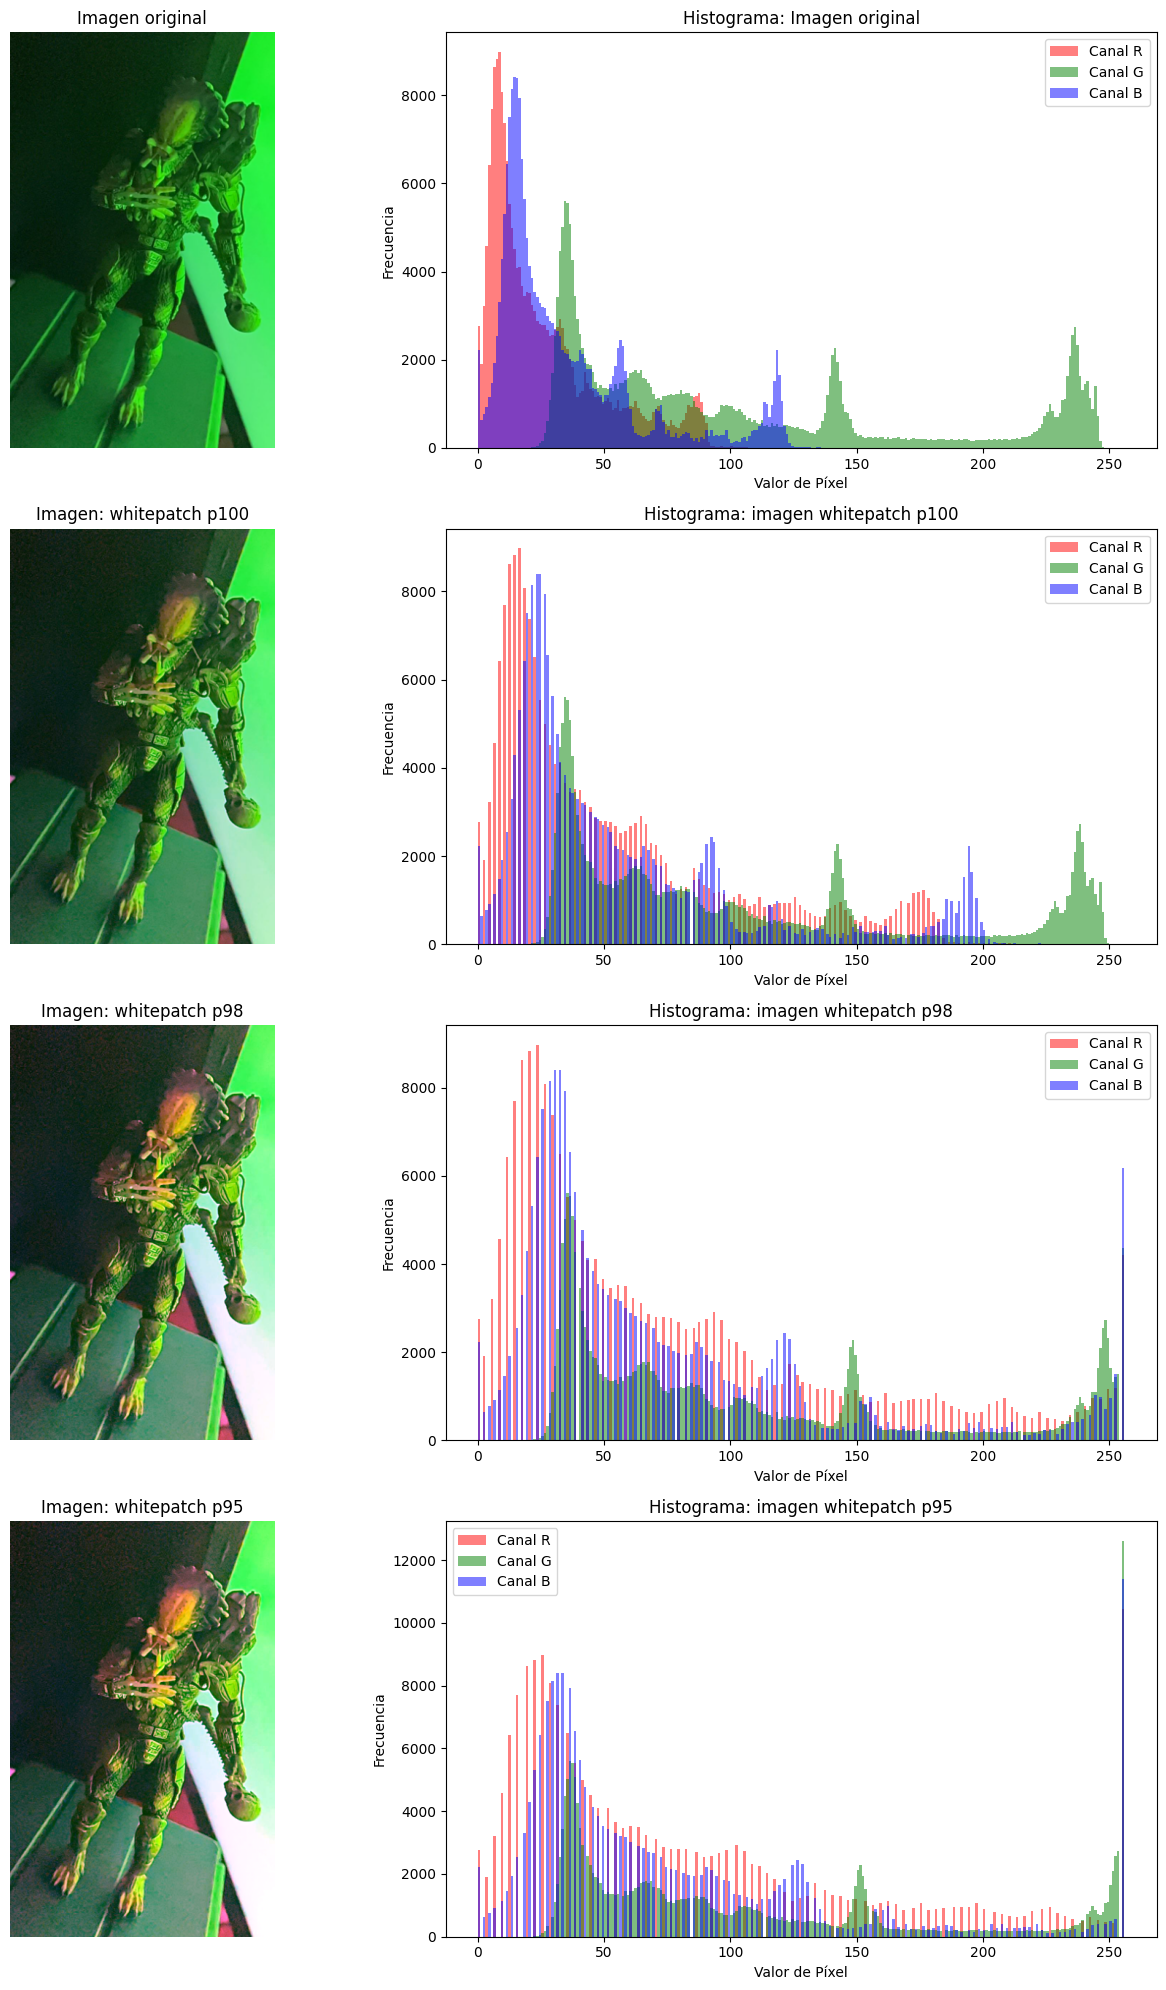

In [41]:
procesarMuestra('white_patch/wp_green.png', [100, 98, 95])


Al analizar los histogramas de la imagen, se observa un claro desequilibrio: mientras que el canal verde presenta una distribución aceptable, los valores de los canales rojo y azul se concentran principalmente en la zona de sombras, por debajo del valor 100.

Debido a que los valores máximos atípicos se encuentran muy alejados de la media, una compensación simple sería ineficaz. Por esta razón, se opta por utilizar el percentil 98, una técnica que permite excluir dichos valores extremos y facilita un mayor y más adecuado desplazamiento en la escala de valores.

Como se puede ver en el resultado, esta aproximación funciona muy bien. Es interesante notar en los histogramas finales que, como era de esperar, el escalado en el canal verde es menos notorio, ya que partía de un mejor balance. En cambio, los canales rojo y azul son los que se expanden de forma significativa para corregir el color.


Valores de referencia (percentil 100) para [R, G, B]: [255. 134. 122.]
Valores de referencia (percentil 98) para [R, G, B]: [255.  66.  99.]
Valores de referencia (percentil 95) para [R, G, B]: [255.  58.  90.]


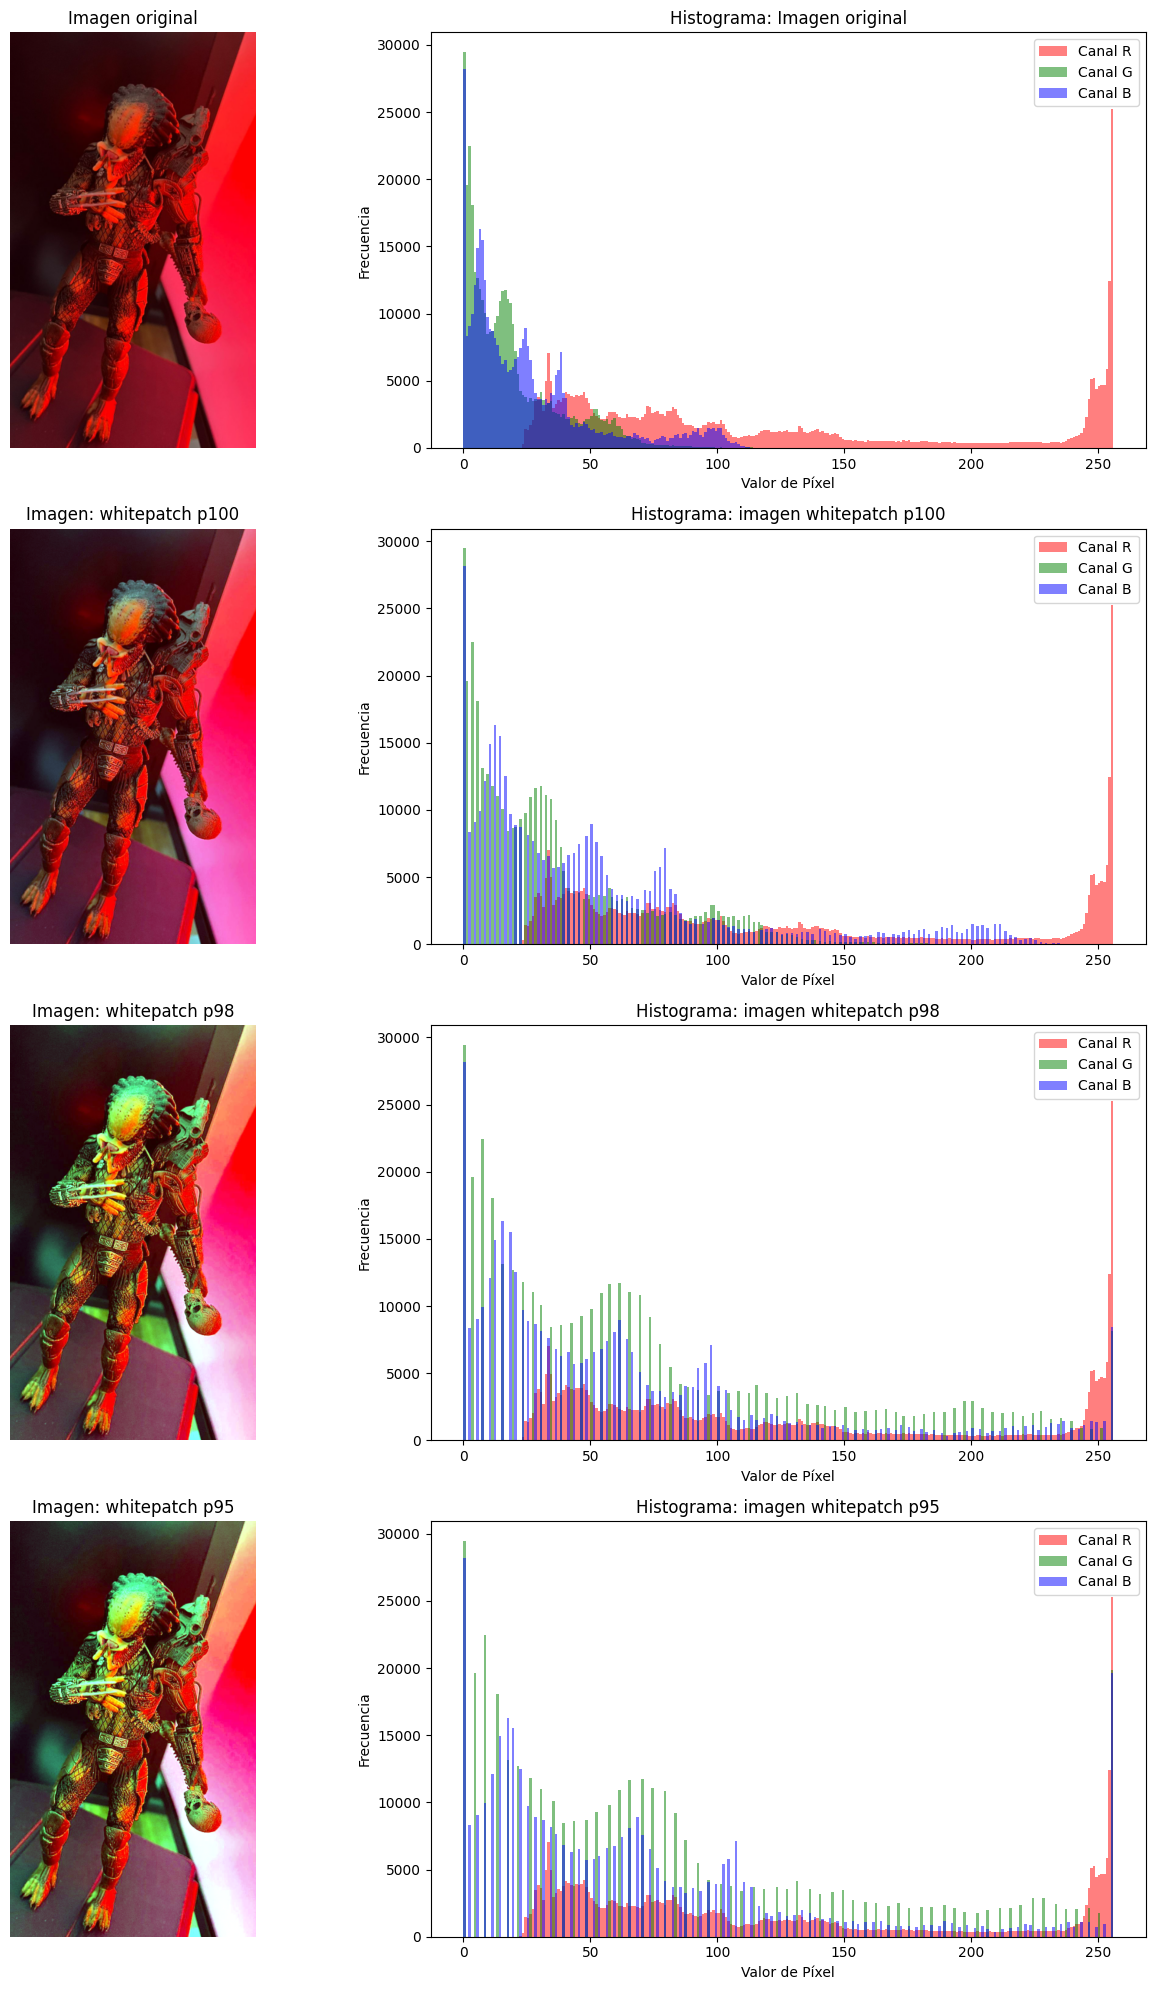

In [42]:
procesarMuestra('white_patch/wp_red.png',[100, 98, 95])

Al analizar los histogramas de la imagen, se observa un claro desequilibrio: mientras que el canal rojo presenta una distribución aceptable, los valores de los canales verde y azul se concentran principalmente en la zona de sombras, por debajo del valor 100.
Debido a que los valores máximos atípicos se encuentran muy alejados de la media, una compensación simple sería ineficaz. Por esta razón, se opta por utilizar el percentil 98, una técnica que permite excluir dichos valores extremos y facilita un mayor y más adecuado desplazamiento en la escala de valores.
Como se puede ver en el resultado, esta aproximación funciona muy bien. Es interesante notar en los histogramas finales que, como era de esperar, el escalado en el canal rojo es menos notorio, ya que partía de un mejor balance. En cambio, los canales verde y azul son los que se expanden de forma significativa para corregir el color.

Valores de referencia (percentil 100) para [R, G, B]: [255. 255. 255.]
Valores de referencia (percentil 98) para [R, G, B]: [ 86.  69. 253.]
Valores de referencia (percentil 95) para [R, G, B]: [ 56.  51. 252.]


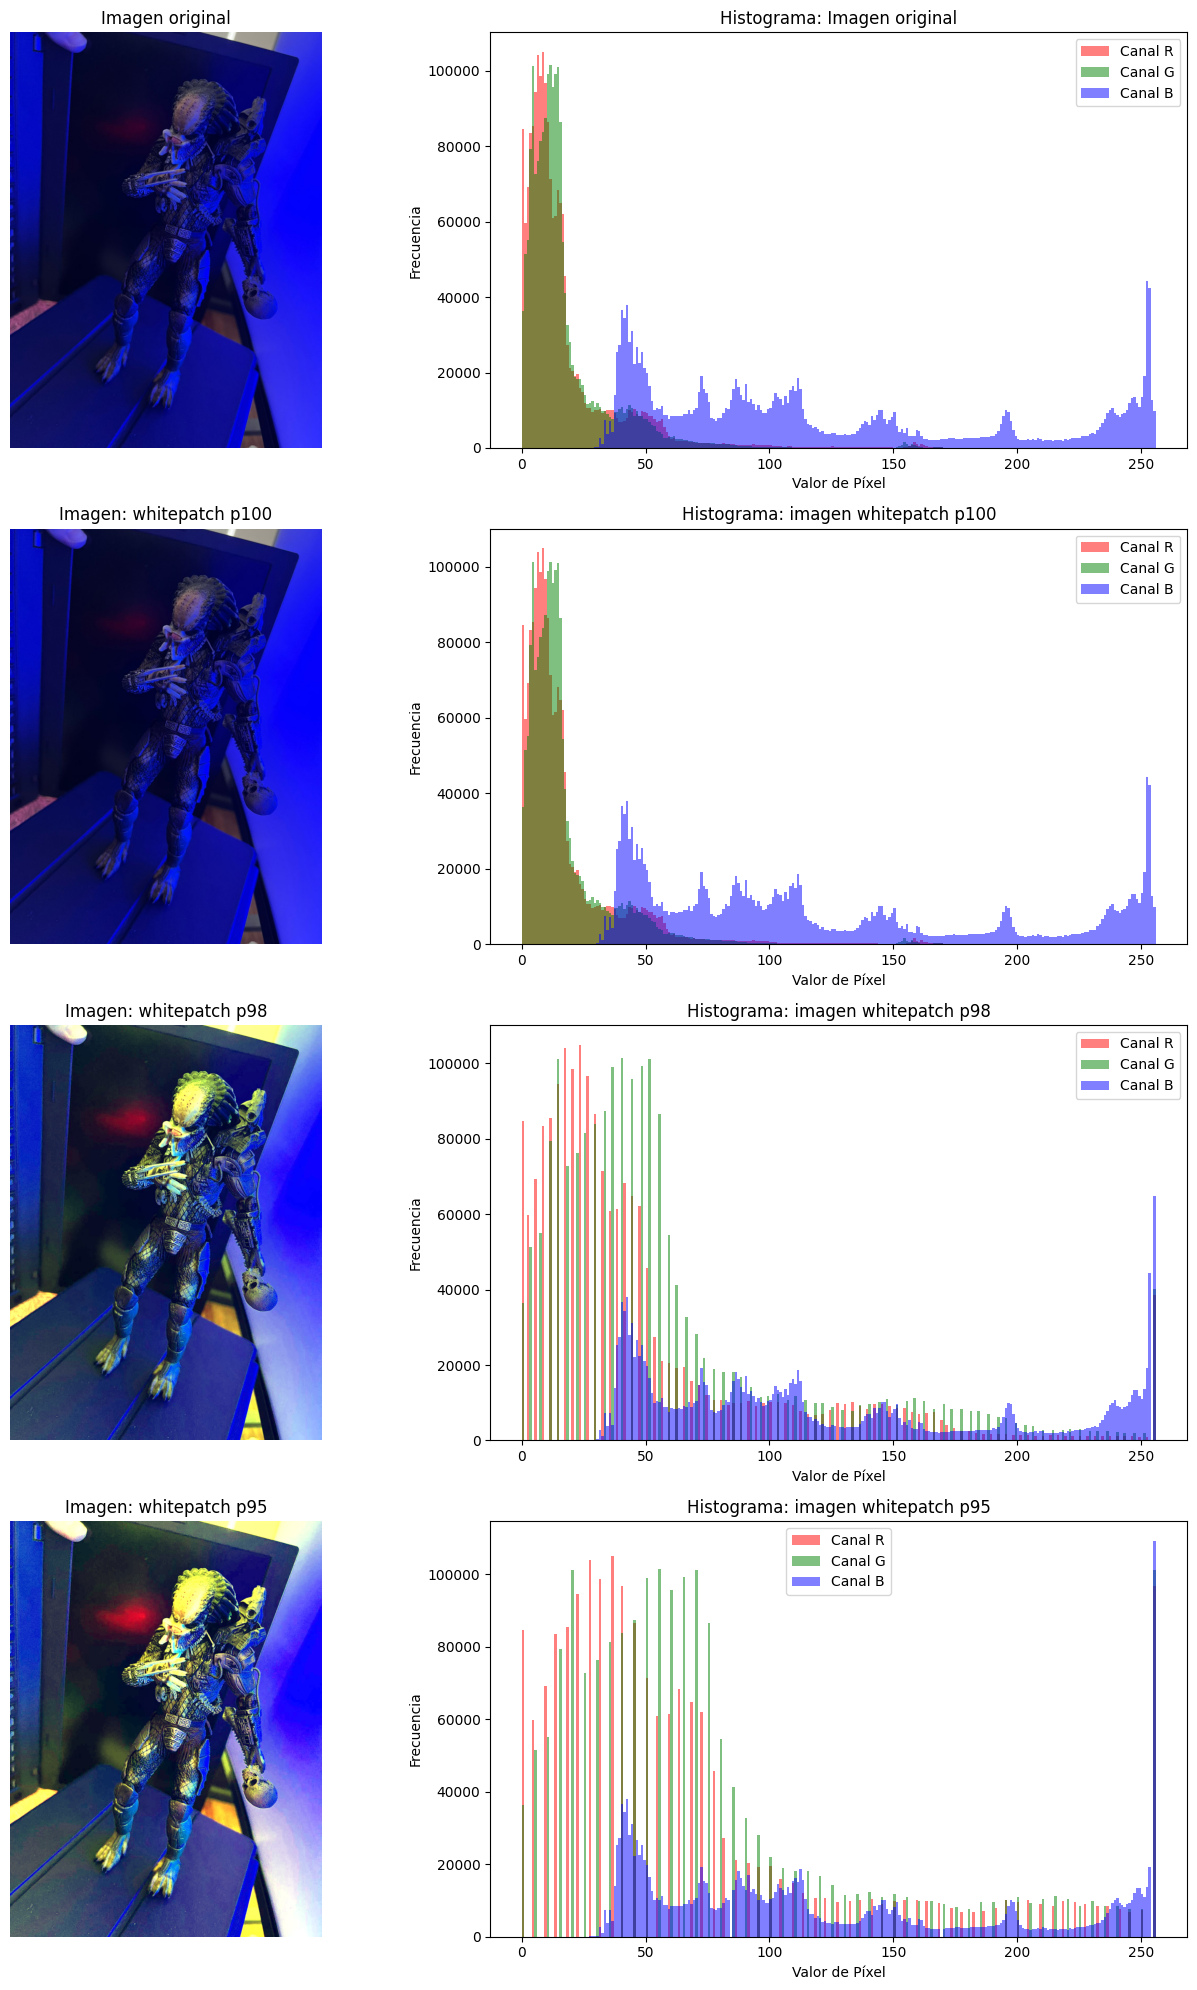

In [43]:
procesarMuestra('white_patch/wp_blue.jpg', [100, 98, 95])

En esta imagen se evidencia que el percentil 100 (P100) es una métrica poco fiable. Como ya hemos visto, no se necesita una gran cantidad de píxeles saturados; basta con que solo uno alcance el valor 255 para que el P100 sea 255, lo cual invalida la corrección.

Al analizar percentiles, vemos que el valor para el canal rojo tanto en P95 como en P98 sigue siendo bastante alto y muy similar. Esto indica que la zona de altas luces está dominada por un color rojo intenso, que podemos observar cerca del hombro del depredador.


Valores de referencia (percentil 100) para [R, G, B]: [170. 255. 172.]
Valores de referencia (percentil 98) para [R, G, B]: [ 58. 255.  44.]
Valores de referencia (percentil 95) para [R, G, B]: [ 30. 255.  24.]


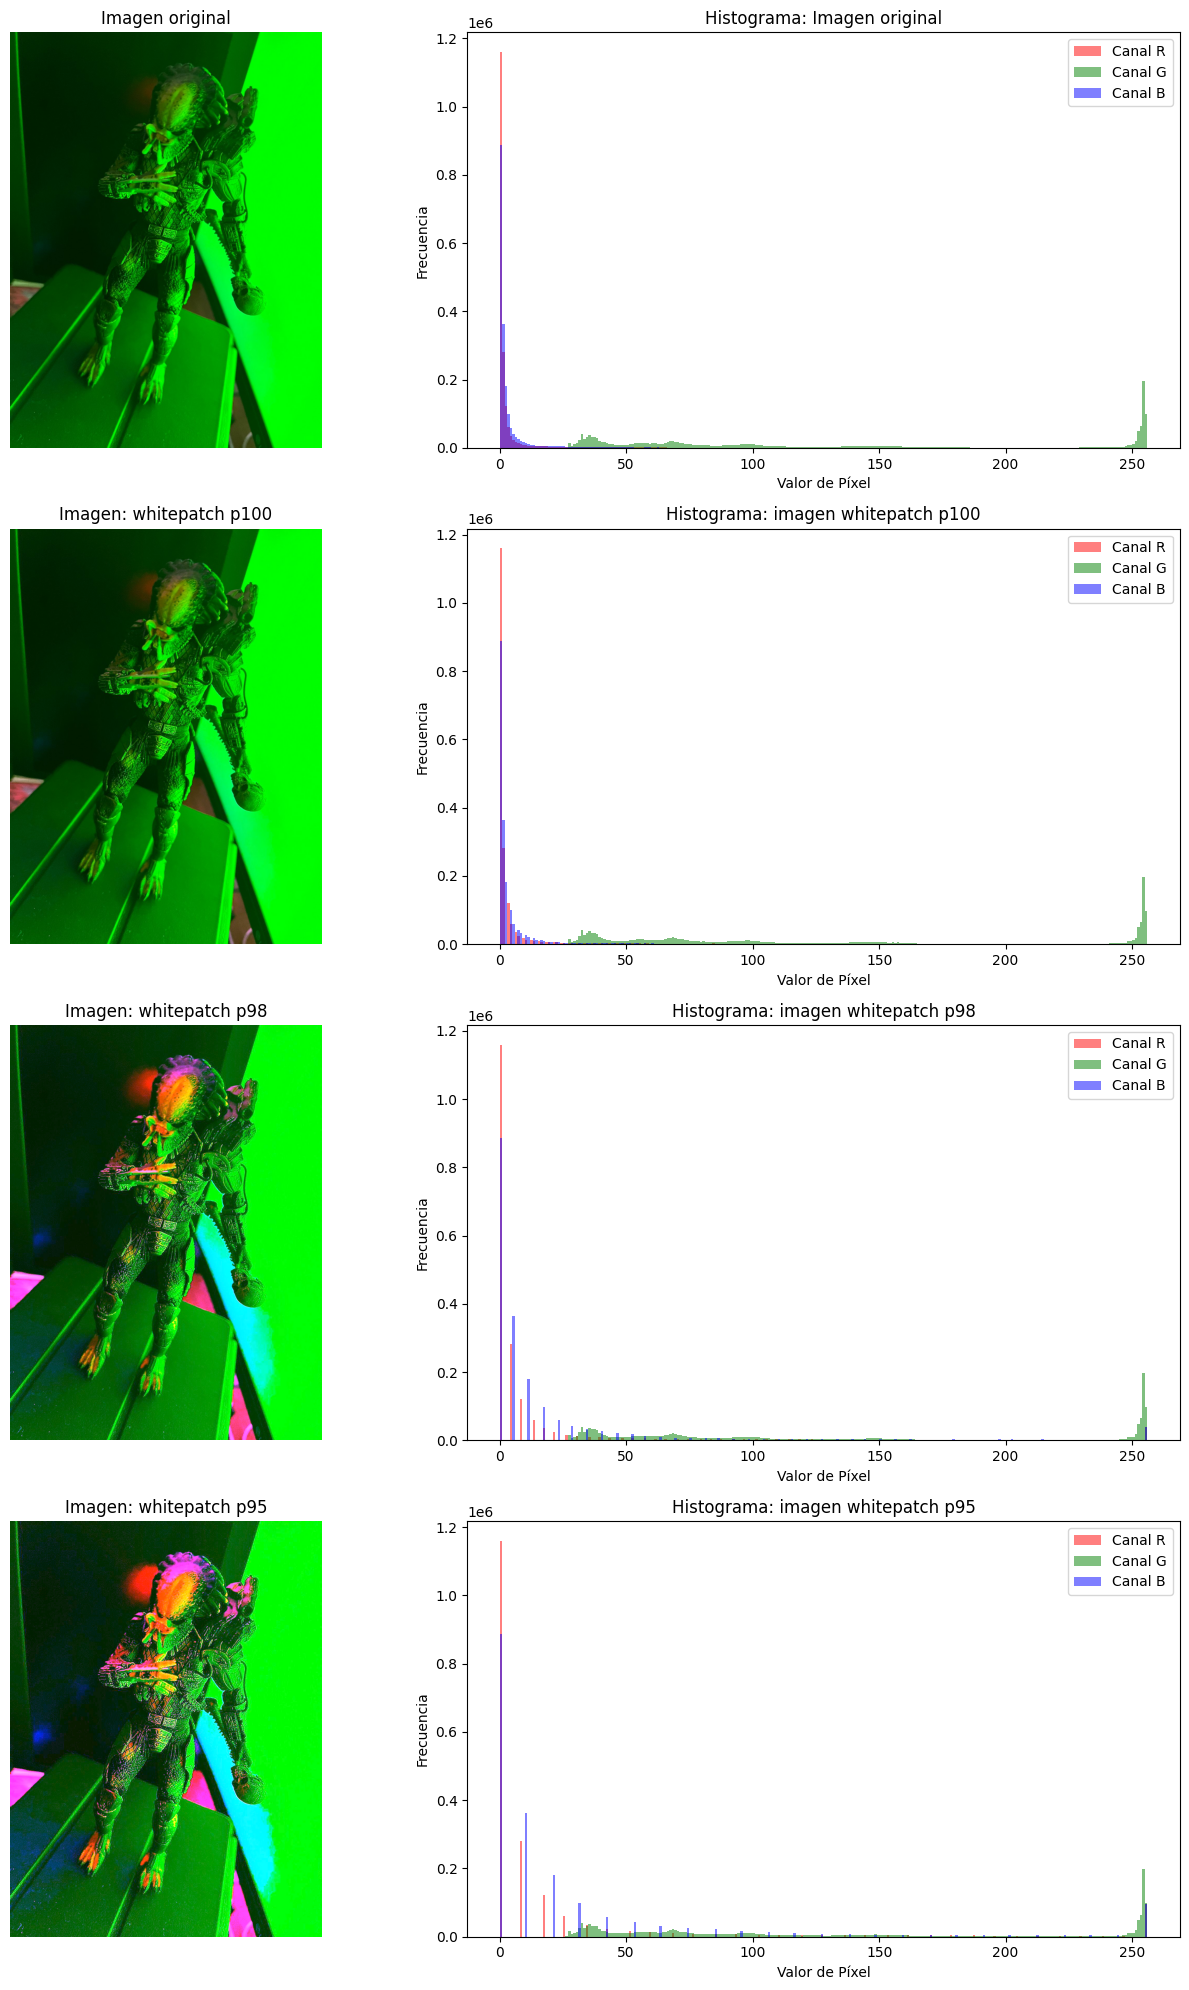

In [44]:
procesarMuestra('white_patch/wp_green2.jpg', [100, 98, 95])

En este caso, una corrección con White Patch es muy difícil, ya que hay muy poca variabilidad en los canales, especialmente en el rojo y el azul. La mayor parte de la información de estos dos canales tiene una gran concentración de valores en el lado de las sombras, con casi todos sus datos por debajo del valor 50.

En contraste, el canal verde está cargado hacia el otro extremo, con su información agrupada principalmente en el segmento de las luces.

Valores de referencia (percentil 100) para [R, G, B]: [255. 201. 203.]
Valores de referencia (percentil 98) para [R, G, B]: [255.  76. 101.]
Valores de referencia (percentil 95) para [R, G, B]: [255.  60.  90.]


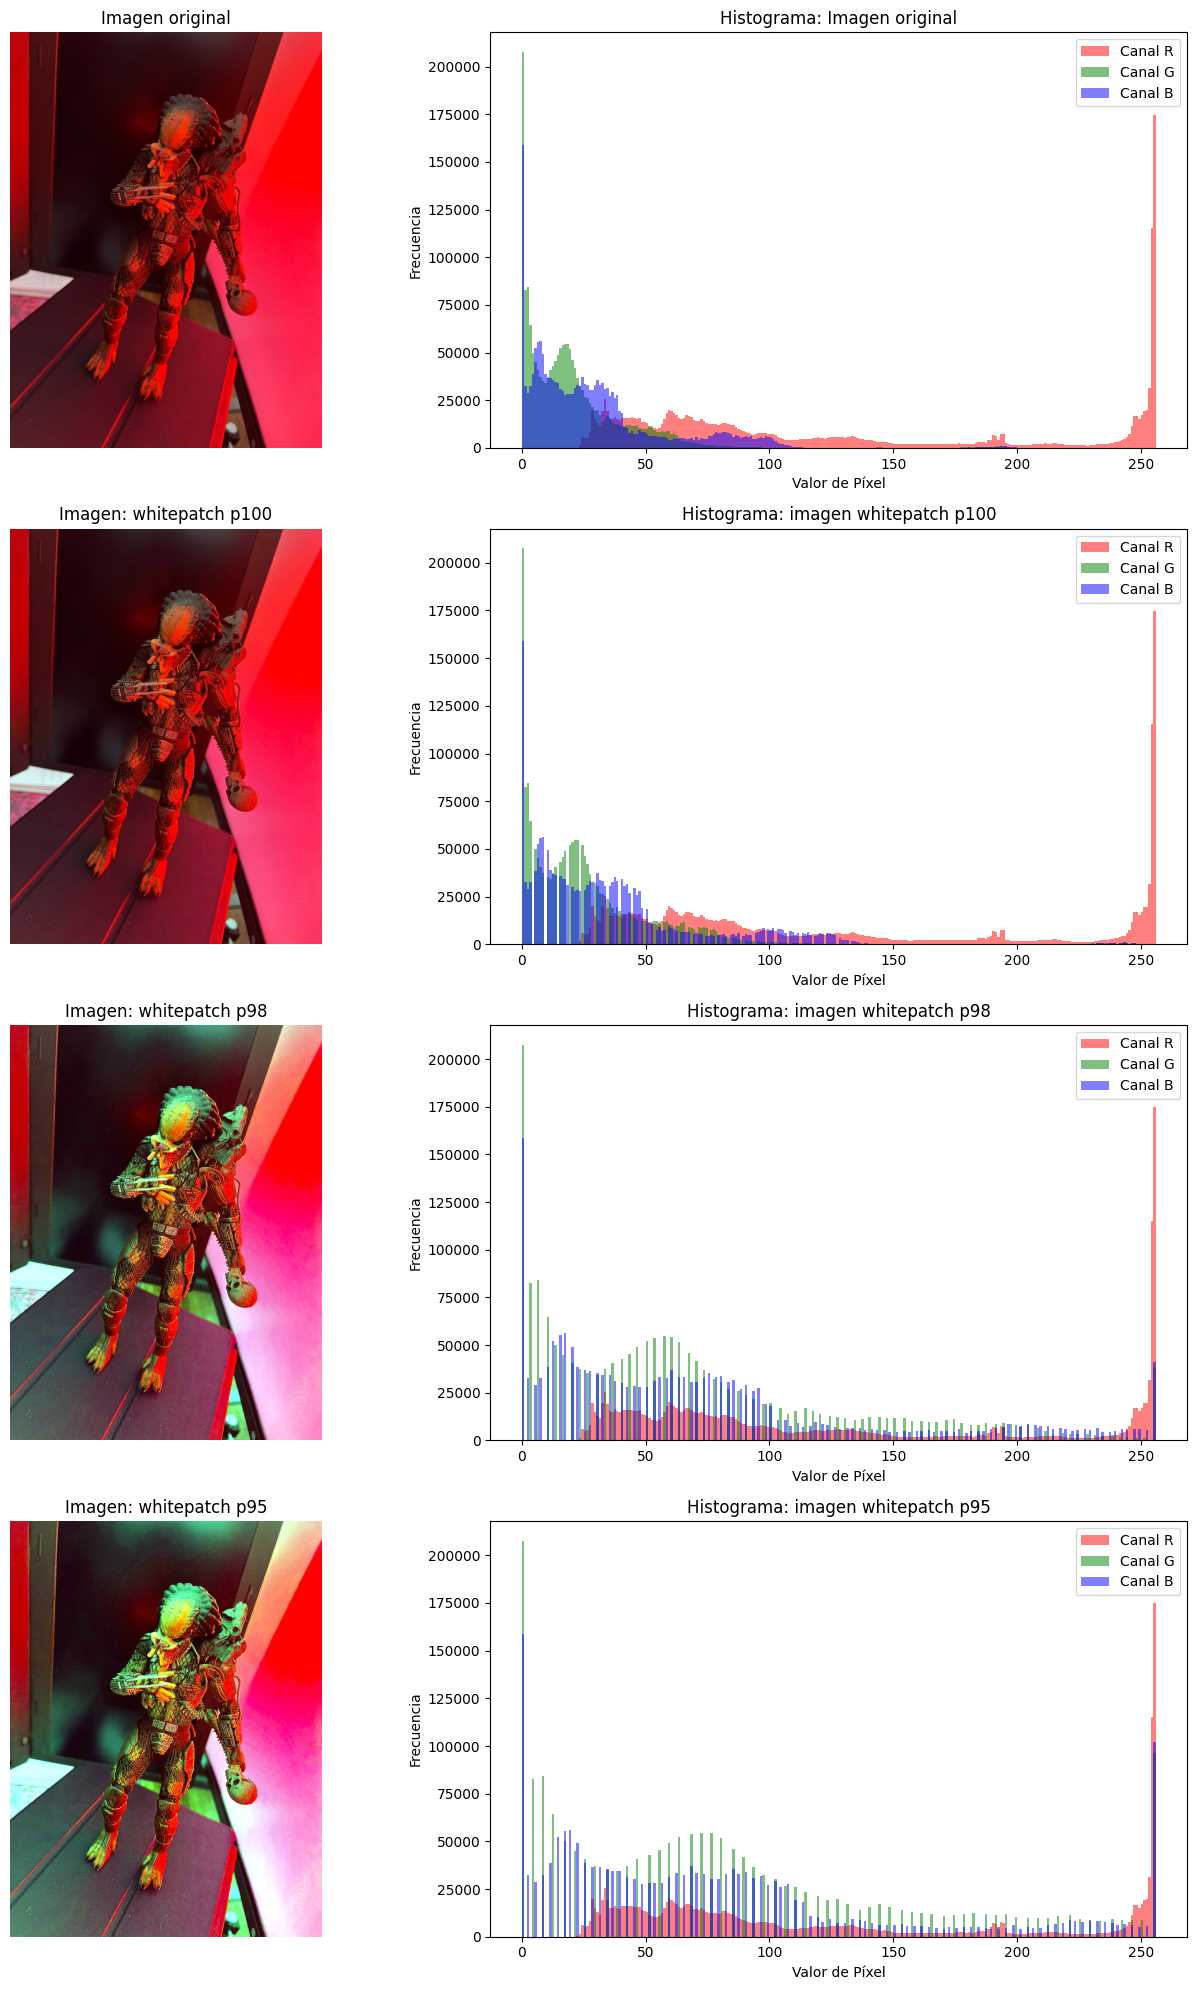

In [45]:
procesarMuestra('white_patch/wp_red2.jpg', [100, 98, 95])


En este último caso, podemos ver que los canales azul y verde tienen una gran concentración de valores en el lado de las sombras, con casi toda su información por debajo del valor 75.

Por otro lado, el histograma del canal rojo es bastante plano en los tonos medios pero está muy pronunciado en el segmento de las luces.

Esta distribución es la que genera el fuerte viraje al rojo, ya que es el único canal con información significativa en las zonas más brillantes de la imagen.